In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#import cab_rides.csv and weather.csv
cab_rides = pd.read_csv('cab_rides.csv')
weather = pd.read_csv('weather.csv')

In [5]:
#head
cab_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [6]:
#head
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [3]:
#describe cab_rides.csv
cab_rides.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [4]:
#describe weather.csv
weather.describe()


,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [9]:
#correlation matrix
corrmat = cab_rides.corr()
corrmat

,distance,time_stamp,price,surge_multiplier
distance,1.000000,0.003553,0.345061,0.024769
time_stamp,0.003553,1.000000,0.000808,0.000572
price,0.345061,0.000808,1.000000,0.240458
surge_multiplier,0.024769,0.000572,0.240458,1.000000


In [10]:
corrmat = weather.corr()
corrmat

,temp,clouds,pressure,rain,time_stamp,humidity,wind
temp,1.000000,0.504693,-0.278630,0.169786,-0.273311,0.387265,0.115752
clouds,0.504693,1.000000,-0.079788,0.157744,-0.097839,0.518758,0.041117
pressure,-0.278630,-0.079788,1.000000,-0.012662,0.519631,-0.101814,-0.543793
rain,0.169786,0.157744,-0.012662,1.000000,-0.208693,0.152143,0.331758
time_stamp,-0.273311,-0.097839,0.519631,-0.208693,1.000000,-0.288118,0.039846
humidity,0.387265,0.518758,-0.101814,0.152143,-0.288118,1.000000,-0.285823
wind,0.115752,0.041117,-0.543793,0.331758,0.039846,-0.285823,1.000000


In [11]:
cab_rides['date_time'] = pd.to_datetime(cab_rides['time_stamp']/1000, unit='s')
weather['date_time'] = pd.to_datetime(weather['time_stamp'], unit='s')

In [12]:
#merge the datasets to refelect same time for a location
cab_rides['merge_date'] = cab_rides.source.astype(str) +" - "+ cab_rides.date_time.dt.date.astype("str") +" - "+ cab_rides.date_time.dt.hour.astype("str")
weather['merge_date'] = weather.location.astype(str) +" - "+ weather.date_time.dt.date.astype("str") +" - "+ weather.date_time.dt.hour.astype("str")

In [14]:
weather.index = weather['merge_date']

In [15]:
cab_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872,Haymarket Square - 2018-11-28 - 1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192,Haymarket Square - 2018-11-30 - 4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064,Haymarket Square - 2018-11-29 - 3


In [16]:
merged_df = cab_rides.join(weather,on=['merge_date'],rsuffix ='_w')
merged_df['rain'].fillna(0,inplace=True)
merged_df = merged_df[pd.notnull(merged_df['date_time_w'])]
merged_df = merged_df[pd.notnull(merged_df['price'])]
merged_df['day'] = merged_df.date_time.dt.dayofweek
merged_df['hour'] = merged_df.date_time.dt.hour
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour'],
      dtype='object')

In [17]:
merged_df.count()

distance            1164996
cab_type            1164996
time_stamp          1164996
destination         1164996
source              1164996
price               1164996
surge_multiplier    1164996
id                  1164996
product_id          1164996
name                1164996
date_time           1164996
merge_date          1164996
temp                1164996
location            1164996
clouds              1164996
pressure            1164996
rain                1164996
time_stamp_w        1164996
humidity            1164996
wind                1164996
date_time_w         1164996
merge_date_w        1164996
day                 1164996
hour                1164996
dtype: int64

In [18]:
merged_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.29,1022.25,0.0000,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9,6,9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2,1,2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2,1,2
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.00,1013.71,0.0000,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4,4,4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.42,998.64,0.0000,1.543462e+09,0.71,11.30,2018-11-29 03:32:09,Haymarket Square - 2018-11-29 - 3,3,3


<AxesSubplot: >

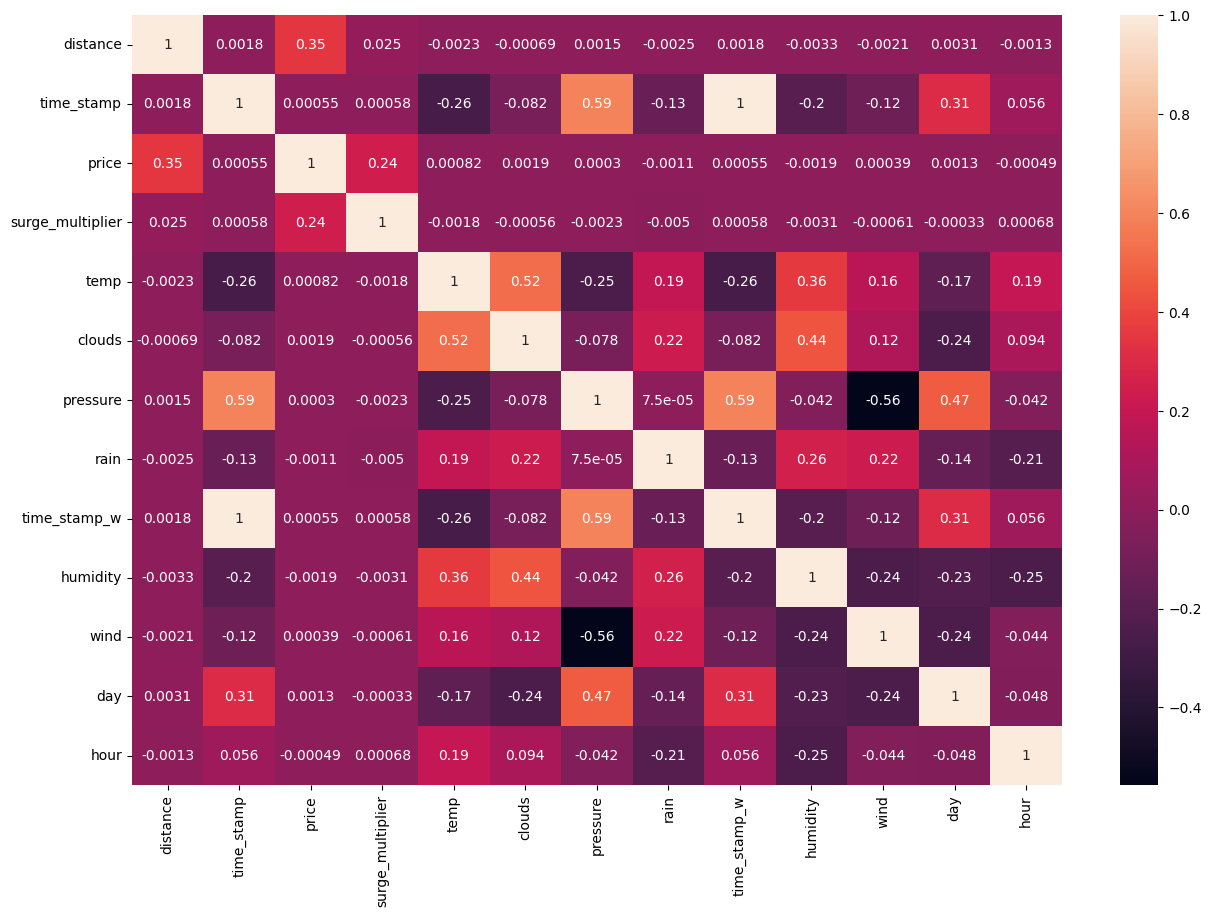

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(merged_df.corr(), annot=True)

In [21]:
#Check for possible null values in the current data set
merged_df.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
date_time           0
merge_date          0
temp                0
location            0
clouds              0
pressure            0
rain                0
time_stamp_w        0
humidity            0
wind                0
date_time_w         0
merge_date_w        0
day                 0
hour                0
dtype: int64

In [22]:
#info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164996 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1164996 non-null  float64       
 1   cab_type          1164996 non-null  object        
 2   time_stamp        1164996 non-null  int64         
 3   destination       1164996 non-null  object        
 4   source            1164996 non-null  object        
 5   price             1164996 non-null  float64       
 6   surge_multiplier  1164996 non-null  float64       
 7   id                1164996 non-null  object        
 8   product_id        1164996 non-null  object        
 9   name              1164996 non-null  object        
 10  date_time         1164996 non-null  datetime64[ns]
 11  merge_date        1164996 non-null  object        
 12  temp              1164996 non-null  float64       
 13  location          1164996 non-null  object 

<AxesSubplot: xlabel='distance', ylabel='price'>

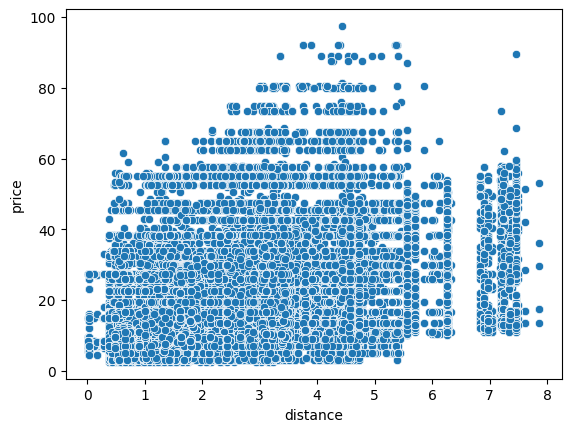

In [23]:
#distance vs price
sns.scatterplot(x="distance", y="price", data=merged_df)

<AxesSubplot: xlabel='rain', ylabel='price'>

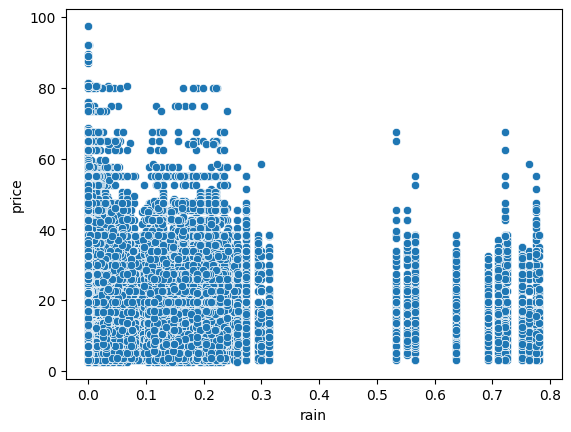

In [24]:
#rain vs price
sns.scatterplot(x="rain", y="price", data=merged_df)


<AxesSubplot: xlabel='surge_multiplier', ylabel='price'>

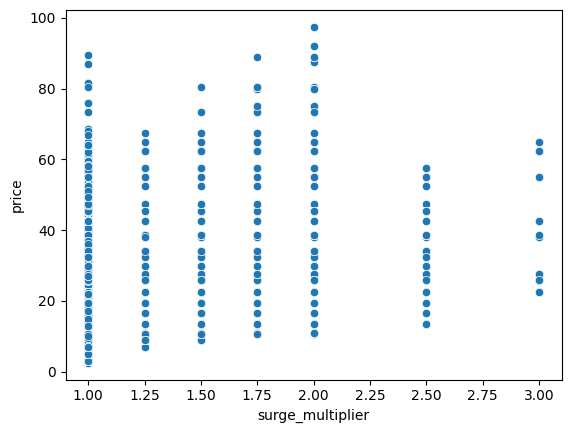

In [25]:
#surge_multiplier vs price
sns.scatterplot(x="surge_multiplier", y="price", data=merged_df)

In [26]:
X = merged_df[merged_df.product_id=='lyft_line'][['day','distance','hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]
X.count()

day         93762
distance    93762
hour        93762
temp        93762
clouds      93762
pressure    93762
humidity    93762
wind        93762
rain        93762
dtype: int64

In [27]:
y = merged_df[merged_df.product_id=='lyft_line']['price'] 
y.count()

93762

In [28]:
X.reset_index(inplace=True)
X = X.drop(columns=['index'])

In [29]:
X.head()

,day,distance,hour,temp,clouds,pressure,humidity,wind,rain
0,6,0.44,9,38.46,0.29,1022.25,0.76,7.68,0.0000
1,0,1.08,6,44.85,0.89,1000.70,0.95,1.53,0.0000
2,4,0.72,2,36.31,0.00,1012.37,0.68,6.85,0.0000
3,1,3.24,3,44.18,0.99,1001.50,0.89,12.40,0.2420
4,1,3.24,3,44.25,1.00,1000.81,0.90,13.70,0.1617


In [30]:
#To convert categorical data into dummy or indicator variables, we can use get_dummies method.
features = pd.get_dummies(X)

In [31]:
features.columns

Index(['day', 'distance', 'hour', 'temp', 'clouds', 'pressure', 'humidity',
       'wind', 'rain'],
      dtype='object')

In [32]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(y)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [34]:
#test train split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
est.fit(train_features, train_labels);
predictions = est.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.11 degrees.


In [37]:
#predict accuracy
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 77.63 %.


In [39]:
#use linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_features, train_labels)
y_pred = regressor.predict(test_features)

In [40]:
#predict accuracy
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 77.63 %.


In [43]:
#use xgb and rf
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.05 degrees.


In [44]:
#predict accuracy of xbg and rf separately 
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.33 %.


In [45]:
#run the algorithm after standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.transform(test_features)

In [46]:
#run xbg, rf, linear regression after standardizing the data
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.05 degrees.


In [47]:
#predict accuracy of xbg and rf separately
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.33 %.
